<a href="https://colab.research.google.com/github/ZHAbotorabi/Supply-Chain/blob/main/Components_of_Time_Series_Trend_Seasonality_Residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Modeling with ARIMA and Facebook Prophet

The time series forecasting methods, **ARIMA** and Facebook Prophet, focusing on modeling the time series data itself (rather than external regressors).
**The process includes data preparation, decomposition, and modeling to extract insights into trend and seasonality for better forecasting.**

Applications:
-	**ARIMA in Retail:** Widely used for predicting sales patterns and planning inventory.
-	**Prophet in Business Forecasting:** Useful for events or products with significant seasonality or irregular patterns.


In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')


In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
time_series= pd.read_csv('timeseries_rev.csv',parse_dates=True)
time_series.head()

,Unnamed: 0,week,year,date,total_revenue
0,96,49,2009,2009-12-01,232177.51
1,99,50,2009,2009-12-07,207908.73
2,101,51,2009,2009-12-14,207685.87
3,103,52,2009,2009-12-21,35731.90
4,0,1,2010,2010-01-04,167636.95


In [ ]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     104 non-null    int64  
 1   week           104 non-null    int64  
 2   year           104 non-null    int64  
 3   date           104 non-null    object 
 4   total_revenue  104 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [ ]:
time_series['date']= pd.to_datetime(time_series['date'])
time_series['date']

,date
0,2009-12-01
1,2009-12-07
2,2009-12-14
3,2009-12-21
4,2010-01-04
...,...
99,2011-11-07
100,2011-11-14
101,2011-11-21
102,2011-11-28


In [ ]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     104 non-null    int64         
 1   week           104 non-null    int64         
 2   year           104 non-null    int64         
 3   date           104 non-null    datetime64[ns]
 4   total_revenue  104 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.2 KB


In [ ]:
time_series = time_series.set_index('date')
time_series.head()

,Unnamed: 0,week,year,total_revenue
date,,,,
2009-12-01,96,49,2009,232177.51
2009-12-07,99,50,2009,207908.73
2009-12-14,101,51,2009,207685.87
2009-12-21,103,52,2009,35731.90
2010-01-04,0,1,2010,167636.95


In [ ]:
monthly_series= time_series.total_revenue.resample('ME').sum()
monthly_series.head()

,total_revenue
date,
2009-12-31,683504.010
2010-01-31,555802.672
2010-02-28,504558.956
2010-03-31,725625.131
2010-04-30,575677.512


<Axes: xlabel='date'>

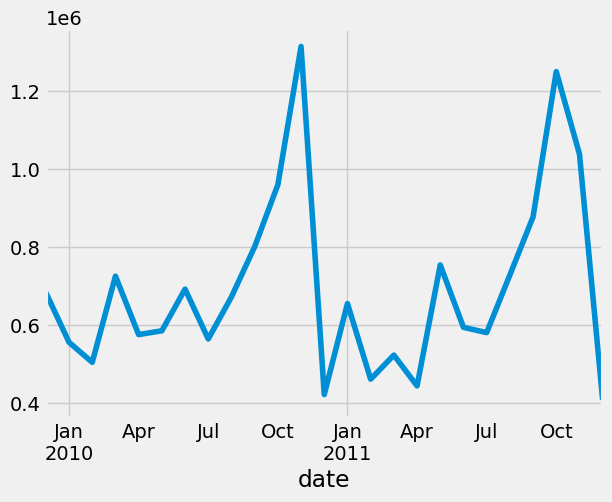

In [ ]:
monthly_series.plot()

## Decomposing Time Series:
- Use decomposition techniques (e.g., Statsmodel's decomposition function) to separate time series into **trend**, **seasonality**, and **residual components**.
-	Helps understand the impact of each component on overall data behavior.


In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=16,8

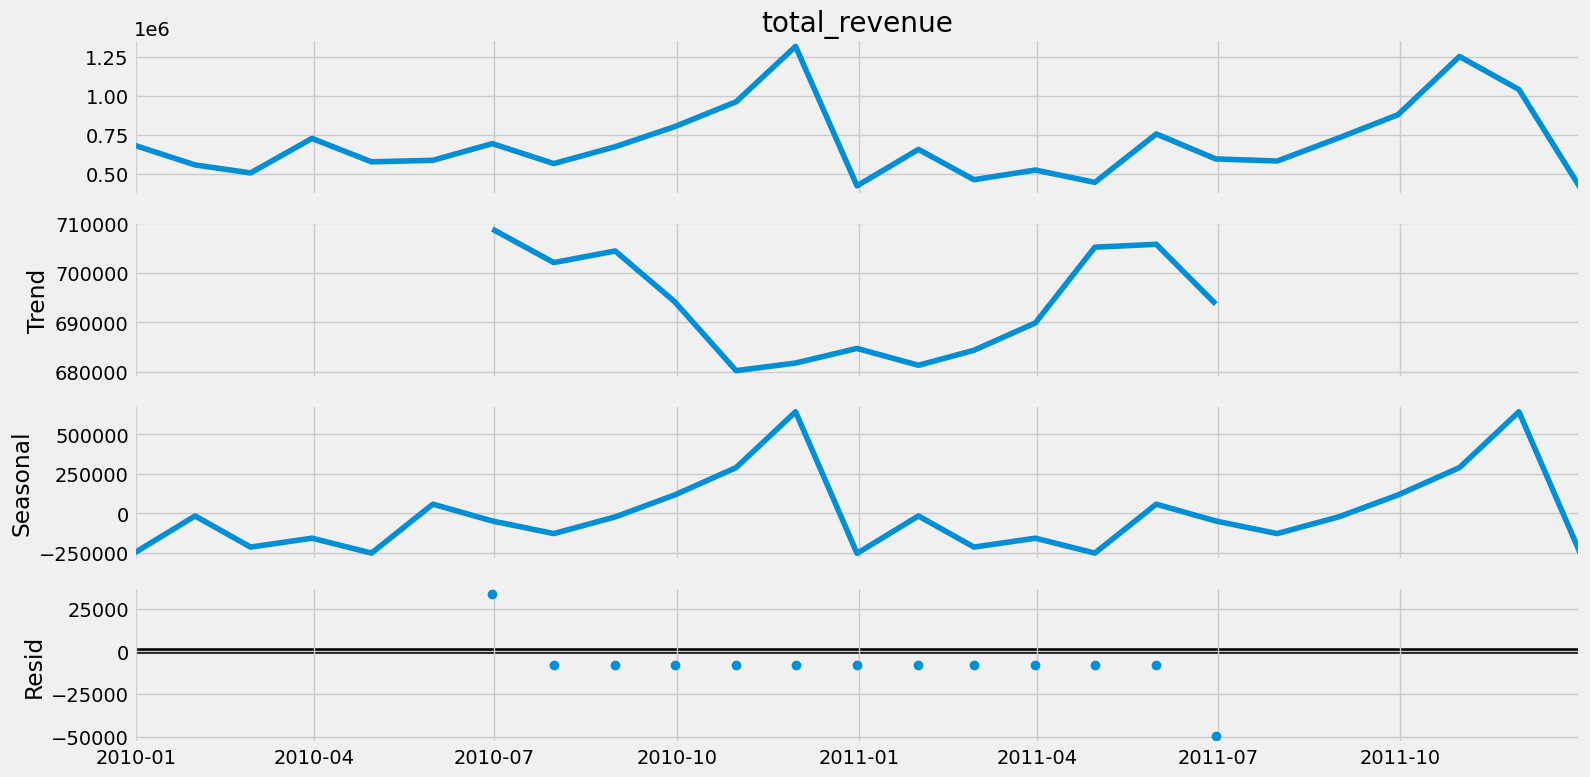

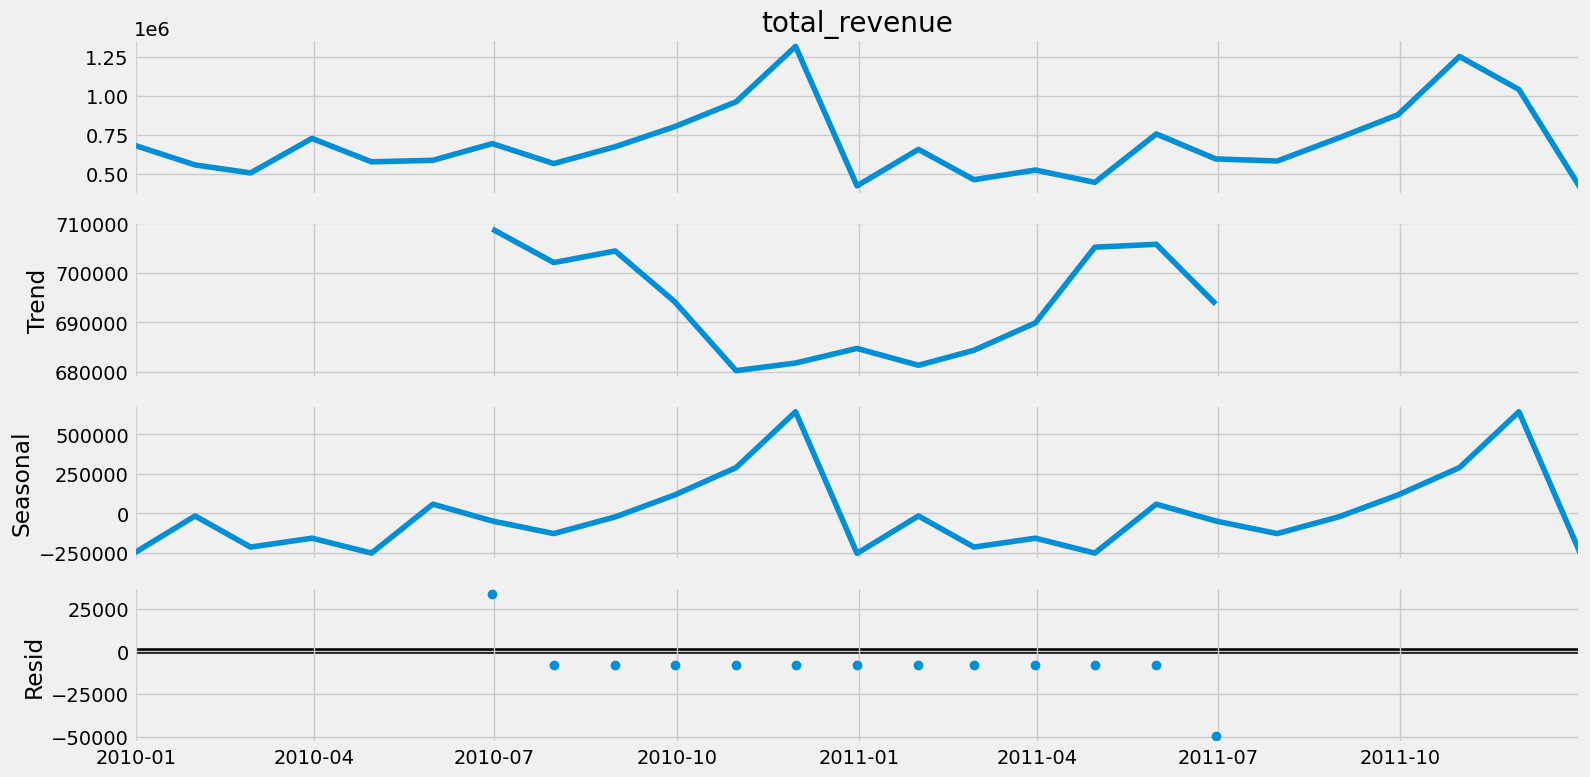

In [ ]:
components= sm.tsa.seasonal_decompose(monthly_series)
components.plot()

# Components of Time series Yt=St+Tt+Rt

Types of Components
# 1.	Time-Based Components:
-	**Seasonality(St)**: Regular patterns or fluctuations over specific intervals (e.g., weekly, monthly, annually).
-	**Trend(Tt)**: General direction of data over time (growth, peak, maturity, or decline).
-	**Remainder/Residuals(Rt)**: Variations in the data not explained by seasonality or trend.

# 2.	Regression-Based Components:
-	To be discussed later, especially in the context of ARIMA models.


# Time-Based Component Details


# 1. Trend(Tt):
-	Reflects long-term changes in data.
-	Example: A new product (e.g., smartphone) shows initial growth, peaks, and eventually declines as demand wanes.
-	Products like PlayStations may show prolonged growth depending on quality and demand cycles.



In [ ]:
trend= components.trend
trend

,trend
date,
2009-12-31,NaN
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,708779.226583
2010-07-31,702018.341917
2010-08-31,704359.372833


# 2. Seasonality (St):
Regular, predictable changes in demand at specific intervals:
- Daily: Weekends show increased mall visits.
-	Monthly: Sales spike during Black Friday or Prime Day.
-	Seasonal: Winter clothes sell in winter; summer clothes sell in summer.

Can occur across multiple intervals, such as daily, weekly, monthly, or yearly.


In [ ]:
seasonality= components.seasonal
seasonality

,seasonal
date,
2009-12-31,-254693.649139
2010-01-31,-17835.907931
2010-02-28,-214813.899222
2010-03-31,-158558.121347
2010-04-30,-252955.190806
2010-05-31,56784.593278
2010-06-30,-49731.965389
2010-07-31,-129379.863222
2010-08-31,-23768.124139


# 3. Remainder (Residuals) Rt:
-	Represents irregular, unpredictable variations after removing trend and seasonality.

In [ ]:
remainder= components.resid
remainder

,resid
date,
2009-12-31,NaN
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,33256.308806
2010-07-31,-8196.798694
2010-08-31,-8196.798694


<Axes: xlabel='date'>

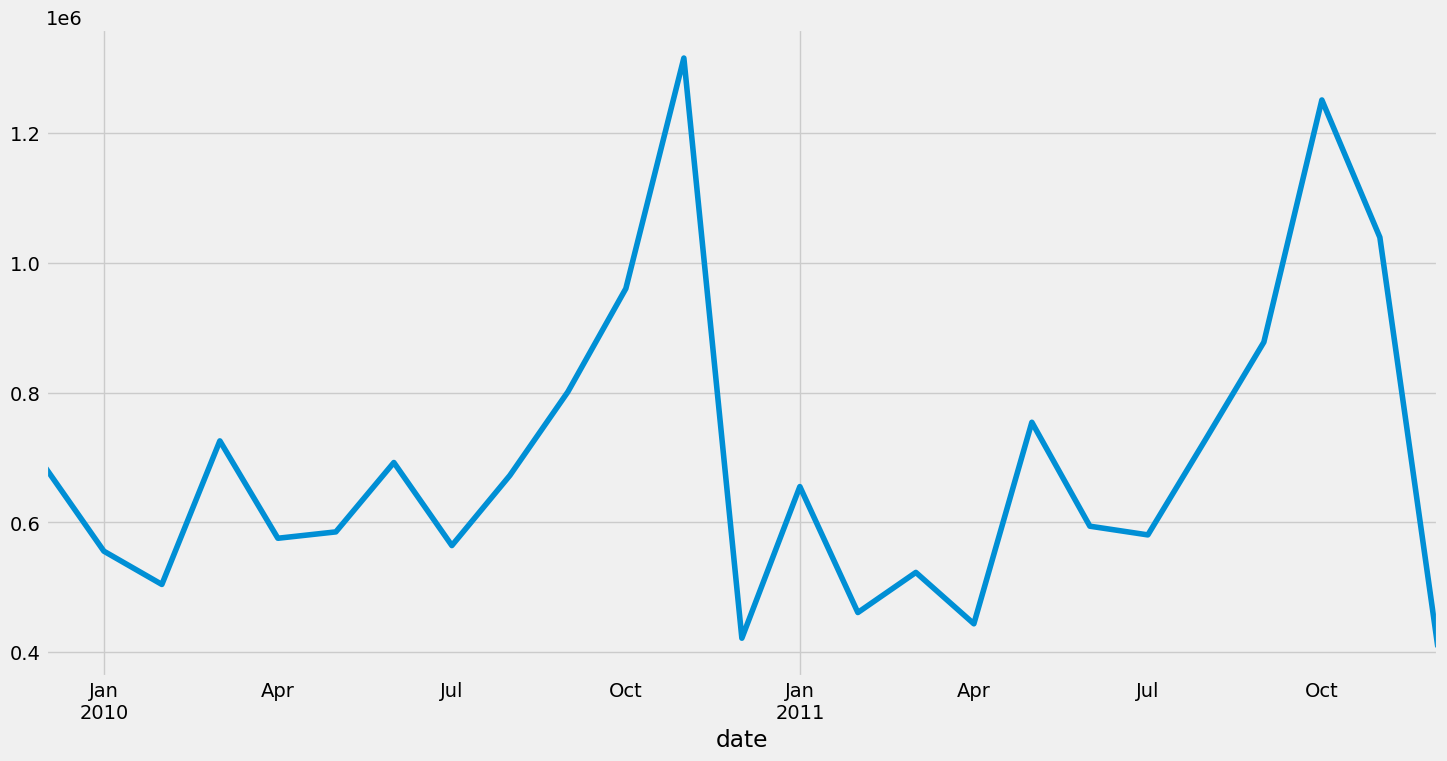

In [ ]:
monthly_series.plot()

<Axes: xlabel='date'>

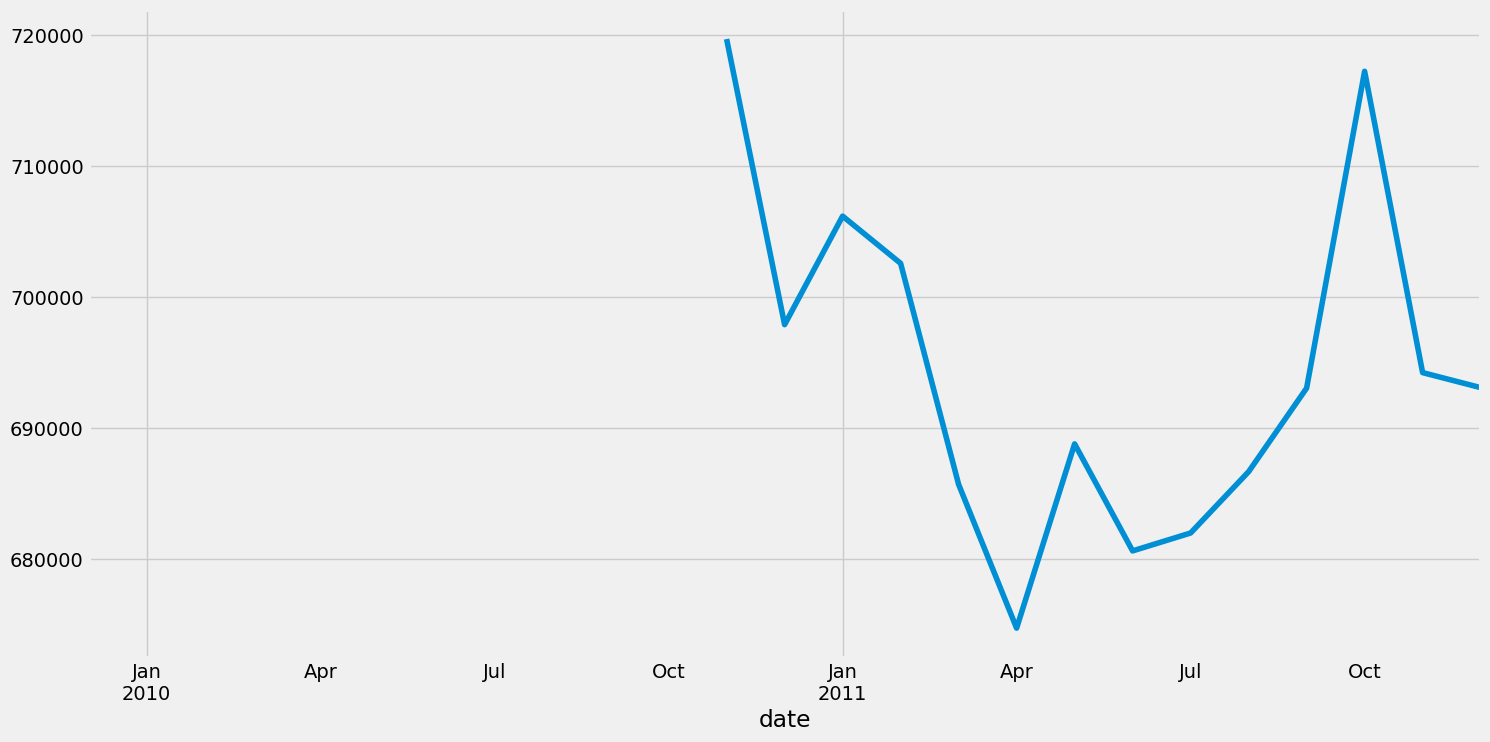

In [ ]:
monthly_series.rolling(window=12).mean().plot()

<Axes: xlabel='date'>

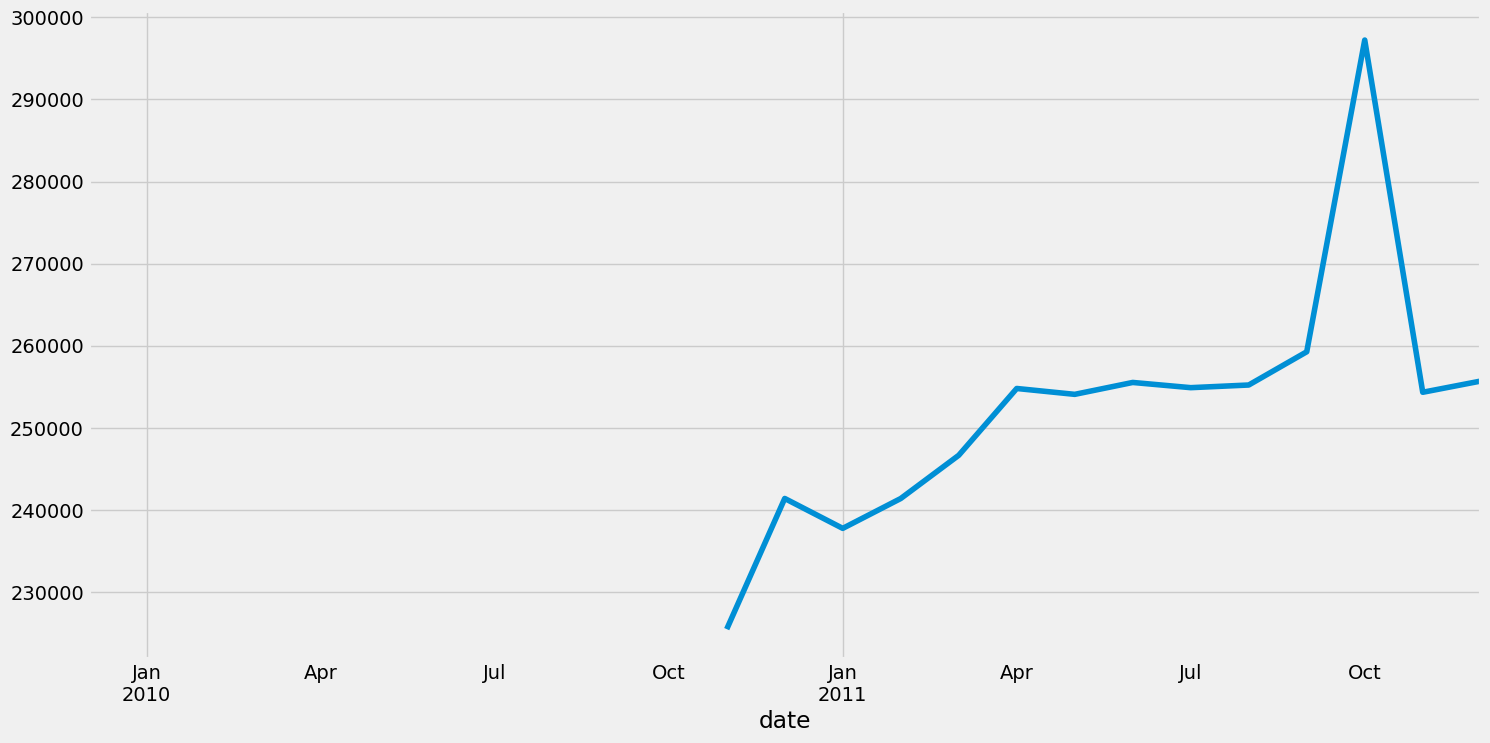

In [ ]:
monthly_series.rolling(window=12).std().plot()

## **Series without Trend**: Add seasonality and residuals to isolate short-term variations

<Axes: xlabel='date'>

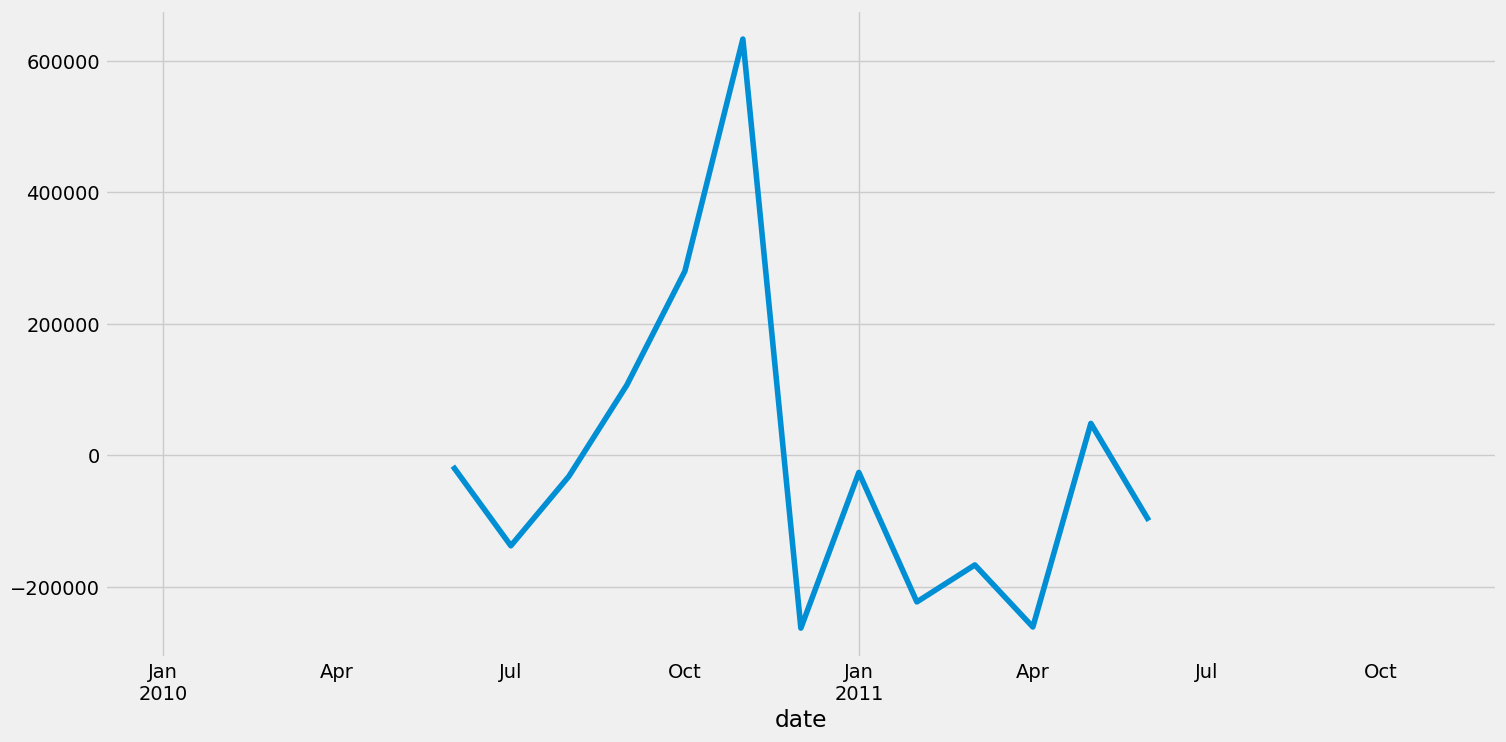

In [ ]:
series_without_trend = seasonality + remainder
series_without_trend.plot()

## **Series without Seasonality:** Add trend and residuals to observe non-seasonal patterns.

<Axes: xlabel='date'>

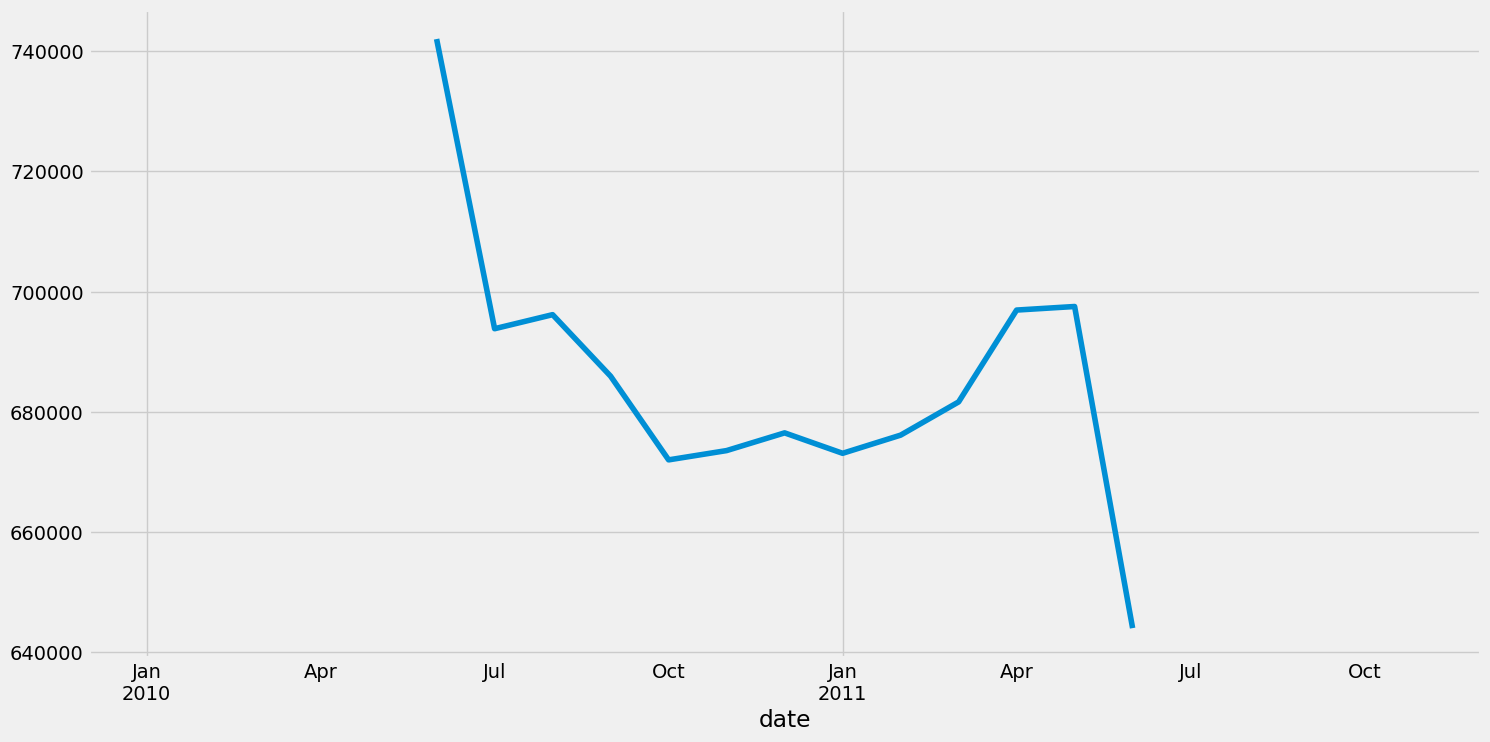

In [ ]:
series_without_seasonality = trend + remainder
series_without_seasonality.plot()

An simple example

``` Python

# Decompose the df time series
result = seasonal_decompose(df['value'], model='additive', period=12)

# Extract the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Compute variances
variance_trend = np.nanvar(trend)  # Use nanvar to handle NaNs in trend
variance_seasonal = np.nanvar(seasonal)
variance_residual = np.nanvar(residual)

# Compute Strength Measurements
strength_trend = 1 - (variance_trend / (variance_trend + variance_residual))
strength_seasonality = 1 - (variance_seasonal / (variance_seasonal + variance_residual))

# Print results
print("Trend Strength:", strength_trend)
print("Seasonality Strength:", strength_seasonality)


In [ ]:
ad_fuller_test= sm.tsa.stattools.adfuller(monthly_series,autolag='AIC')
ad_fuller_test


(-3.6538709278964343,
 0.004810825532514097,
 9,
 15,
 {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445},
 418.7649518406608)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

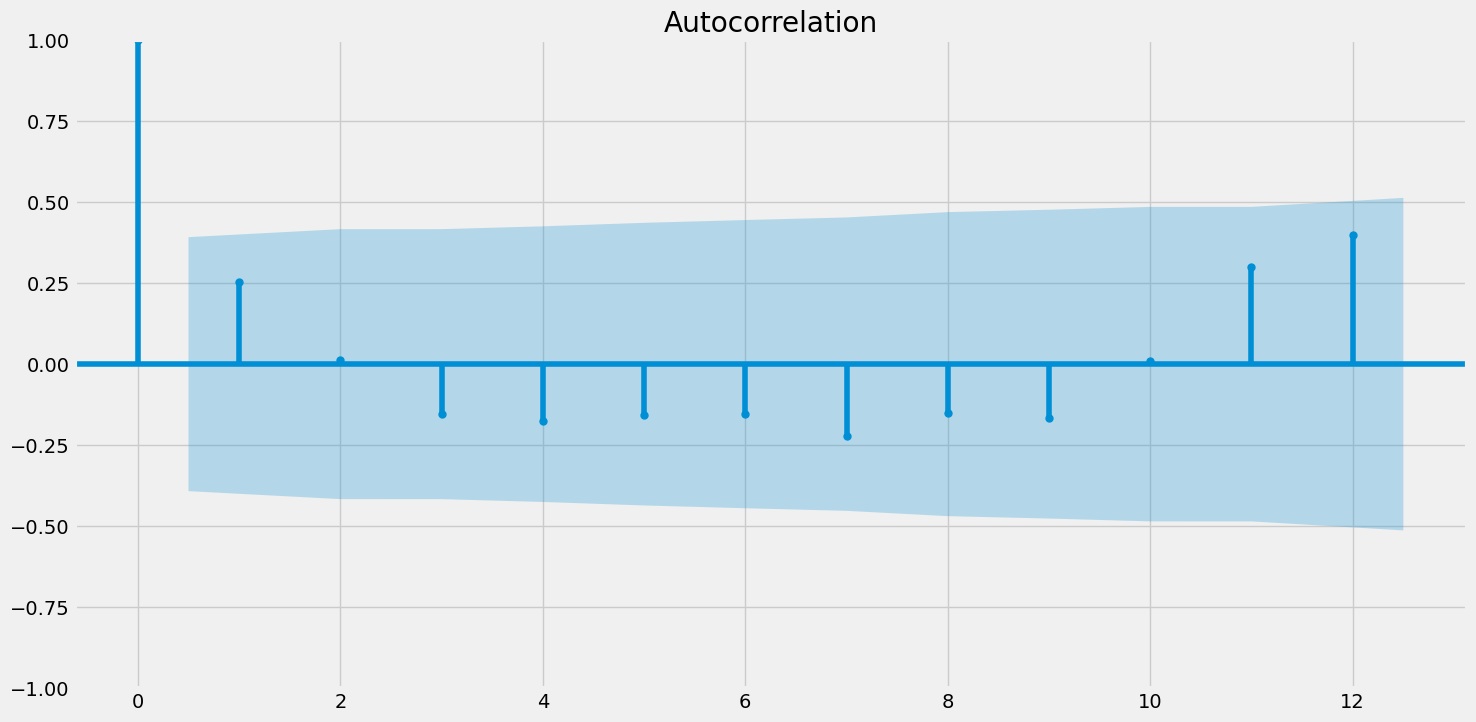

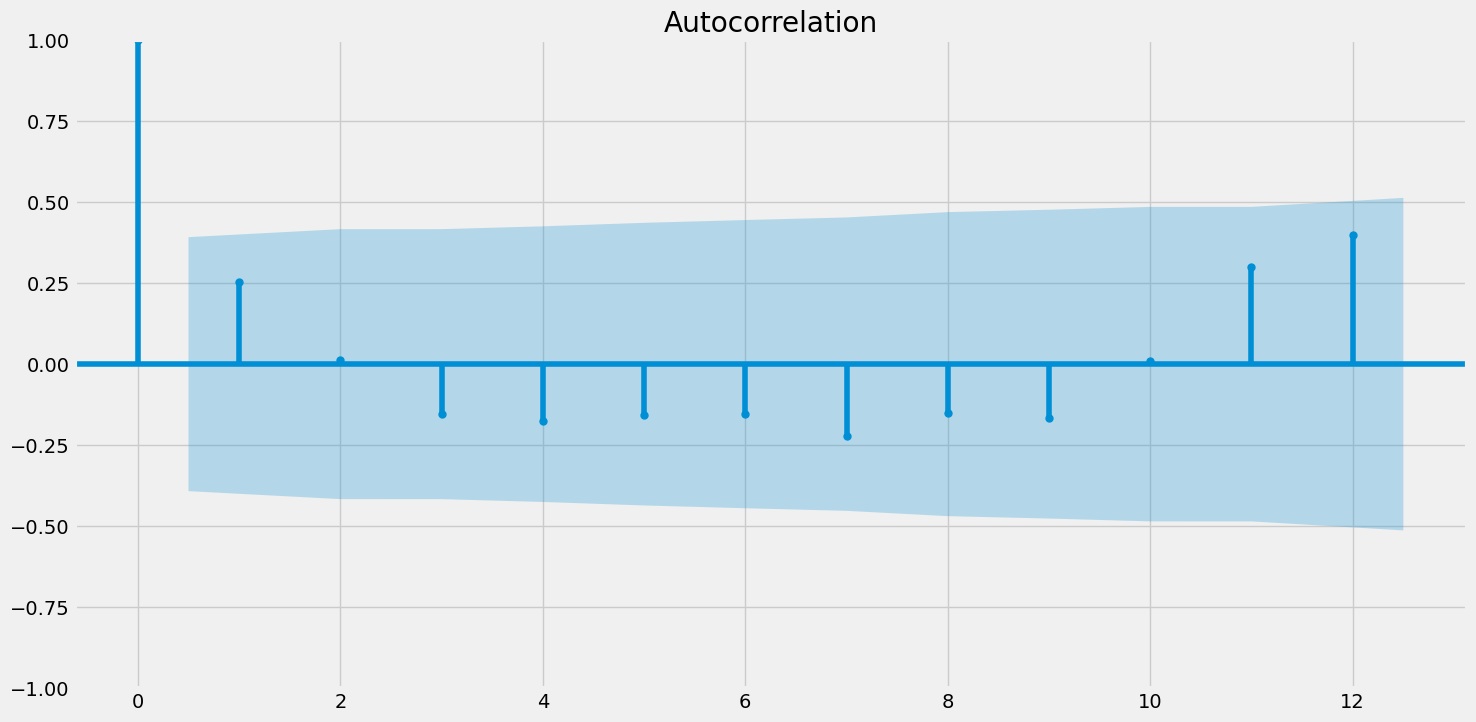

In [ ]:
plot_acf(monthly_series)

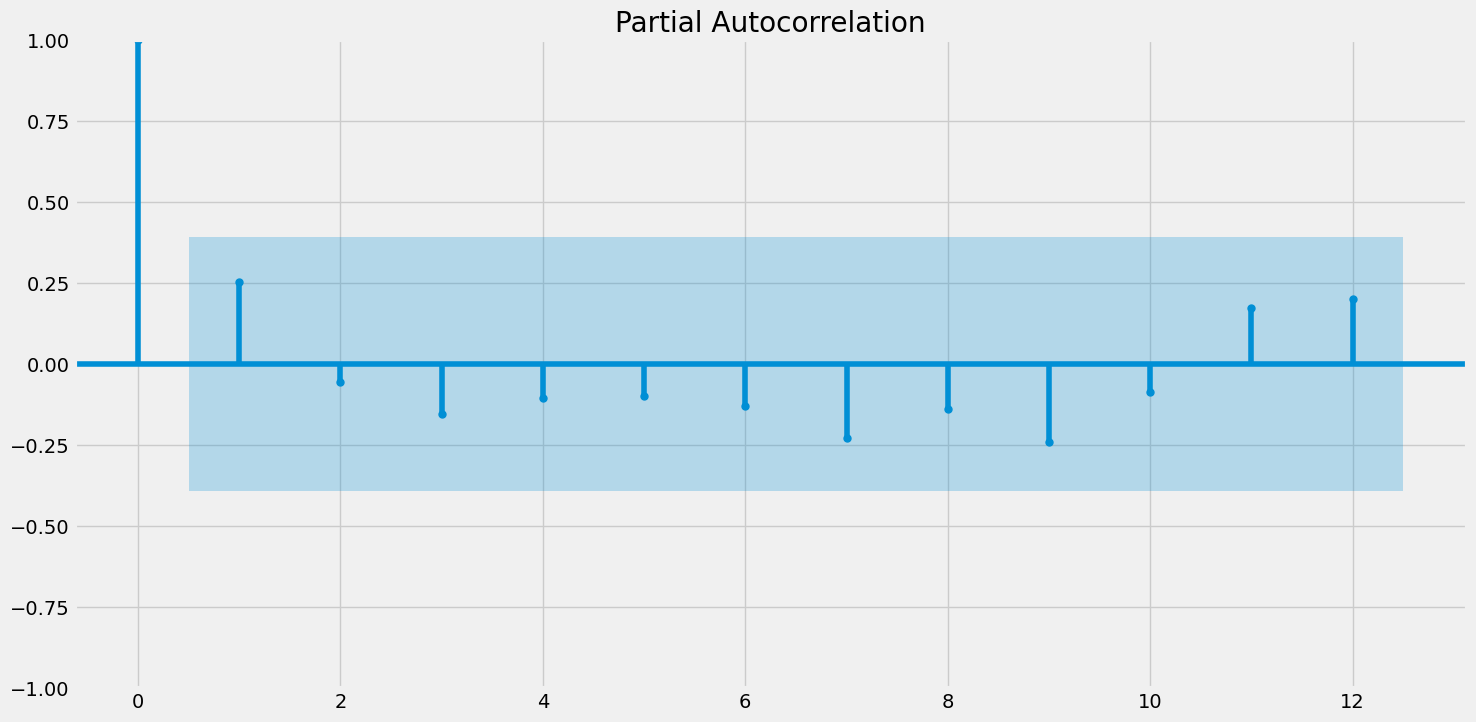

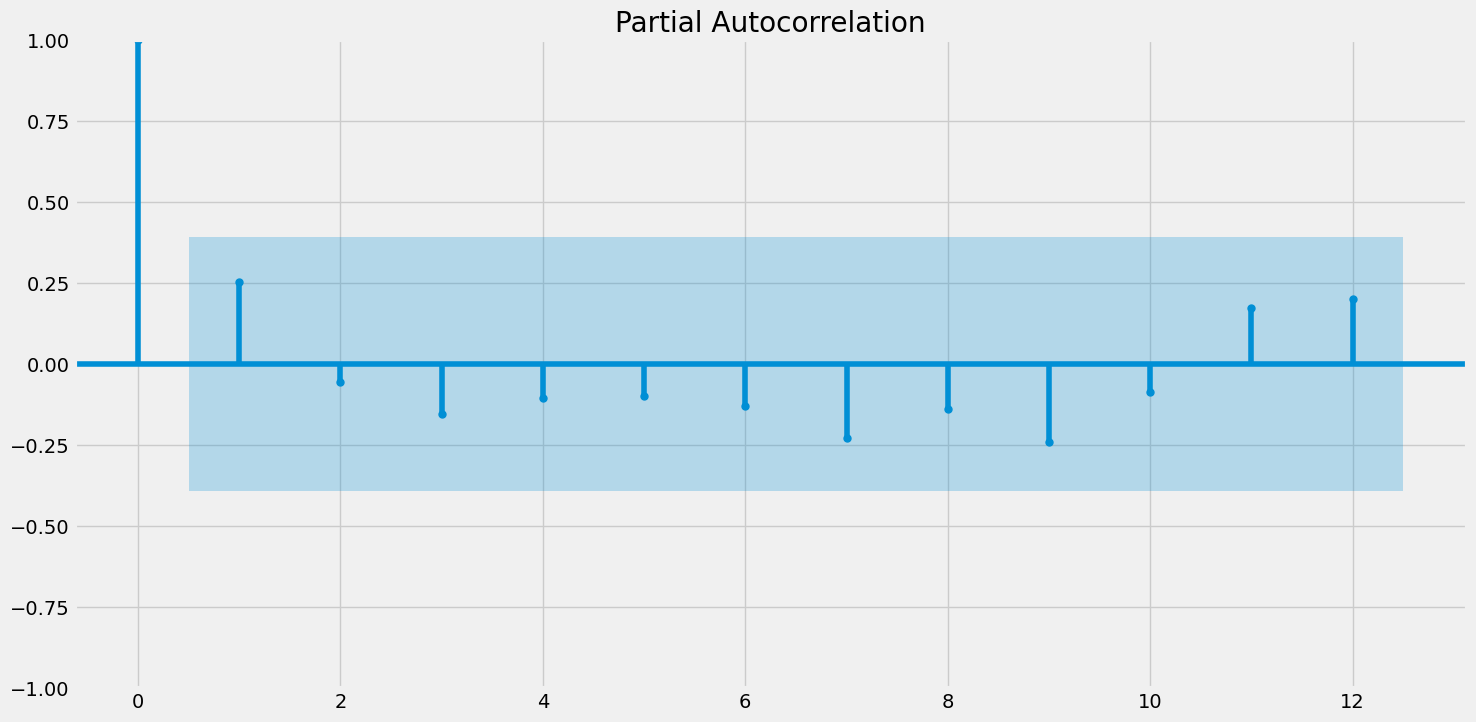

In [ ]:
plot_pacf(monthly_series)

In [ ]:
model_ma= sm.tsa.statespace.SARIMAX(monthly_series,order= (0,0,1))
#results_ma= model_ma.fit()

In [ ]:
results_ma= model_ma.fit()
results_ma

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
results_ma.aic

735.7906414433097

In [ ]:
model_AR= sm.tsa.statespace.SARIMAX(monthly_series,order= (1,0,0))
results_AR= model_AR.fit()

results_AR.aic

703.4620739015523

In [ ]:
model_ARma= sm.tsa.statespace.SARIMAX(monthly_series,order= (1,0,1))
results_ARma= model_ARma.fit()

results_ARma.aic

702.1603952406704

In [ ]:
model_ARima= sm.tsa.statespace.SARIMAX(monthly_series,order= (1,1,1))
results_ARima= model_ARima.fit()

results_ARima.aic

672.0261771707904

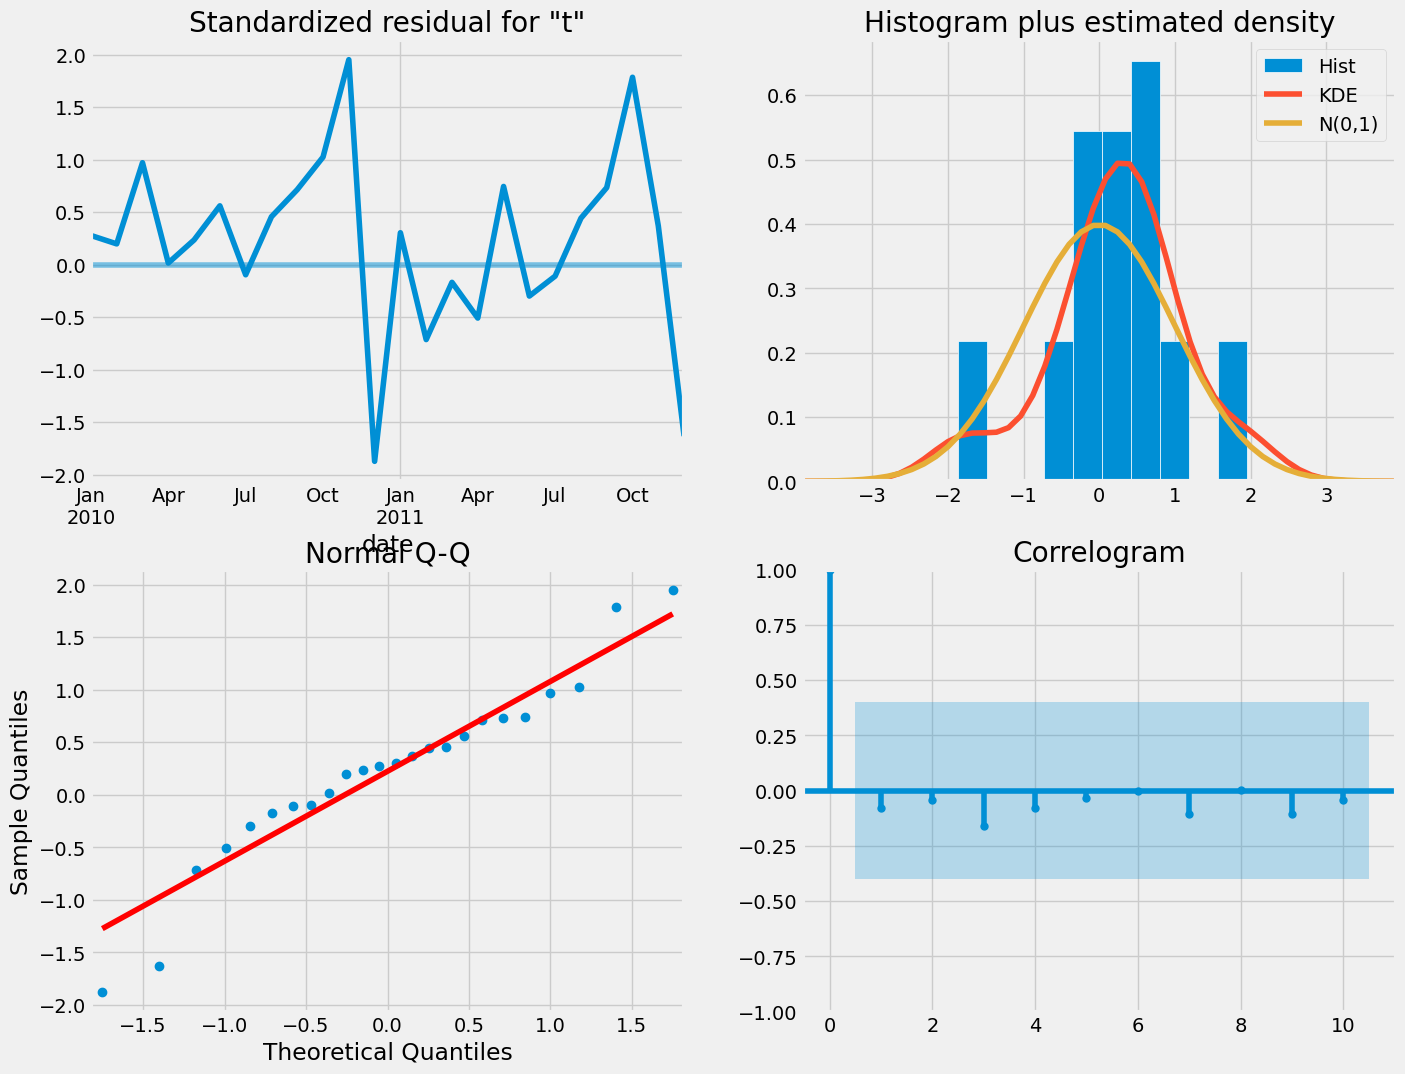

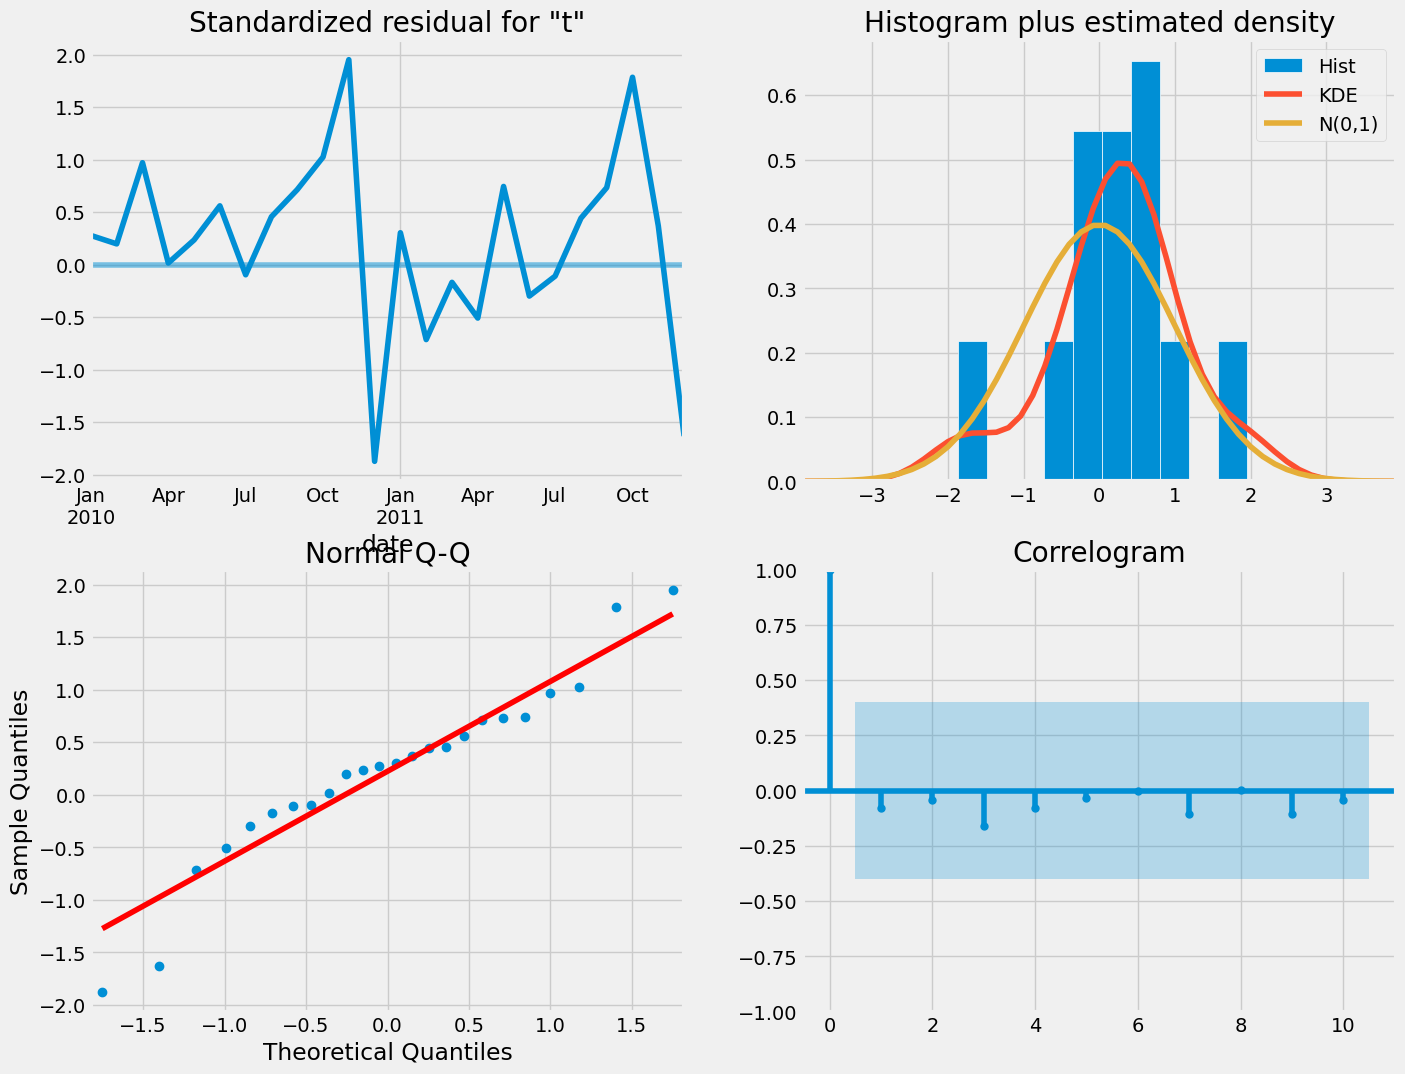

In [ ]:
results_ARima.plot_diagnostics(figsize=(15, 12))